In [29]:
import os, sys
import glob
import csv
import numpy as np
import cv2


import openface
from openface.align_dlib import TEMPLATE

module_path = os.path.abspath("../")
if module_path not in sys.path:
    sys.path.append(module_path)
module_path = os.path.abspath("../..")
if module_path not in sys.path:
    sys.path.append(module_path)

from utils.FaceAligner import FaceAligner
from dataset_utils.config import DS_ROOT
from dataset_utils.utils import get_image_paths
from dataset_utils.utils import imshow, imshow_by_name
from dataset_utils.utils import get_bb_and_landmarks_dict

from utils.utils import apply_func_against_srcdir_and_save_to_dstdir

In [71]:
def mark_landmarks(img, img_name, bblms=None):
    assert bblms is not None
    if img_name not in bblms:
        return None
    lms = bblms[img_name]['landmarks']
    bb = bblms[img_name]['bb']
    for lm in lms:
        cv2.circle(img, (lm[0], lm[1]), 1, (0, 0, 255), -1)
    left, top, right, bottom = bb
    return img[top:bottom, left:right]

In [20]:
bblms = get_bb_and_landmarks_dict()

In [73]:
src_dir = os.path.join(DS_ROOT, "transformed")
dst_dir = os.path.join(DS_ROOT, "face_with_landmarks")
apply_func_against_srcdir_and_save_to_dstdir(src_dir, dst_dir, mark_landmarks, \
                                                 give_fname=True, \
                                                 bblms=bblms)

99710
99710 / 99710

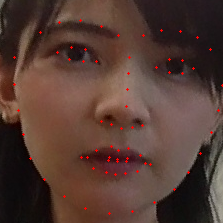

In [72]:
path = paths['0001'][0]
img = cv2.imread(path)
name = os.path.basename(path)
img2 = mark_landmarks(img, name, bblms)
imshow(img2)